In [1]:
# REFERÊNCIA https://juliateachingctu.github.io/Julia-for-Optimization-and-Learning/stable/lecture_08/unconstrained/

In [25]:
using LinearAlgebra

In [2]:
f(x) = 
sin(x[1] + x[2]) + cos(x[1])^2
g(x) = [cos(x[1] + x[2]) - 2*cos(x[1])*sin(x[1]); cos(x[1] + x[2])]


g (generic function with 1 method)

In [3]:
f(x1,x2) = f([x1;x2])

f([0; 0])
f([0; 0])

1.0

In [4]:
g([0;0])

2-element Vector{Float64}:
 1.0
 1.0

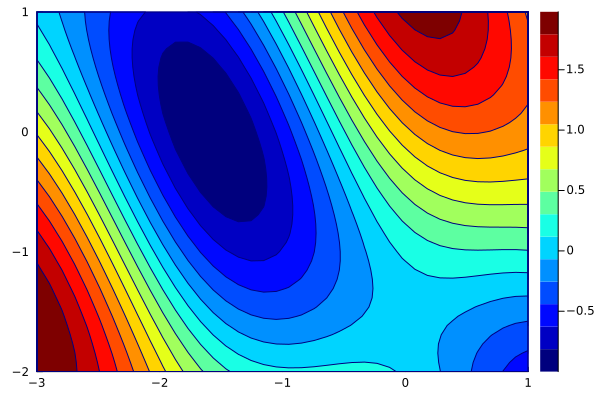

In [5]:
using Plots

xs = range(-3, 1, length = 40)
ys = range(-2, 1, length = 40)

contourf(xs, ys, f, color = :jet)

In [6]:
#finite_difference(f, x::Real; h=1e-8) = (f(x+h) - f(x)) / h


In [7]:
#x = [-2; -1]
#fin_diff(h) = finite_difference(y -> f(x[1], y), x[2]; h=h)

In [8]:
#true_grad = g(x)[2]


In [9]:
#hs = 10. .^ (-15:0.01:-1)


In [10]:
plot(hs, fin_diff,
    xlabel = "h",
    ylabel = "Partial gradient wrt y",
    label = ["Approximation" "True gradient"],
    xscale = :log10,
)

hline!([true_grad]; label =  "True gradient")

LoadError: UndefVarError: hs not defined

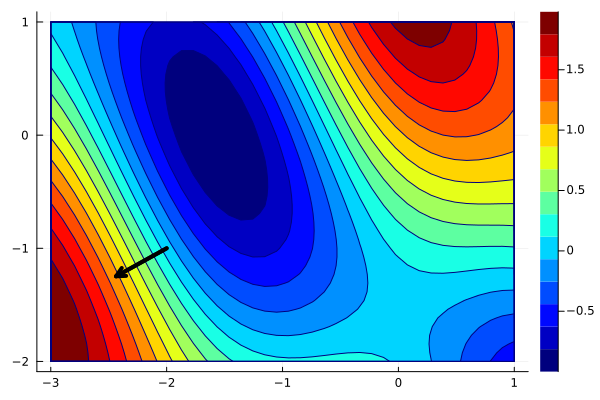

In [11]:
x = [-2; -1]
α = 0.25
x_grad = [x x.+α.*g(x)]

contourf(xs, ys, f; color = :jet)
plot!(x_grad[1, :], x_grad[2, :];
    line = (:arrow, 4, :black),
    label = "",
)

In [27]:
function optim(f, g, x, α; max_iter=200)
    xs = zeros(length(x), max_iter+1)
    xs[:,1] = x
    i=0
    while(norm(g(x))> 0.0001)
        x -= α*g(x)
        xs[:,i+1] = x
        i=i+1
    end
    return xs
end

optim (generic function with 1 method)

In [13]:
using Random

function create_anim(
    f,
    path,
    xlims,
    ylims,
    file_name = joinpath(pwd(), randstring(12) * ".gif");
    xbounds = xlims,
    ybounds = ylims,
    fps = 15,
)
    xs = range(xlims...; length = 100)
    ys = range(ylims...; length = 100)
    plt = contourf(xs, ys, f; color = :jet)

    # add constraints if provided
    if !(xbounds == xlims && ybounds == ylims)
        x_rect = [xbounds[1]; xbounds[2]; xbounds[2]; xbounds[1]; xbounds[1]]
        y_rect = [ybounds[1]; ybounds[1]; ybounds[2]; ybounds[2]; ybounds[1]]

        plot!(x_rect, y_rect; line = (2, :dash, :red), label="")
    end

    # add an empty plot
    plot!(Float64[], Float64[]; line = (4, :arrow, :black), label = "")

    # extract the last plot series
    plt_path = plt.series_list[end]

    # create the animation and save it
    anim = Animation()
    for x in eachcol(path)
        push!(plt_path, x[1], x[2]) # add a new point
        frame(anim)
    end
    gif(anim, file_name; fps = fps, show_msg = false)
    return nothing
end

create_anim (generic function with 2 methods)

In [14]:
x_gd = optim([], g, [0; -1], 0.1)

xlims = (-3, 1)
ylims = (-2, 1)
create_anim(f, x_gd, xlims, ylims, "anim6.gif")

In [15]:
x_gd = optim([], g, [0; -1], 0.01)

create_anim(f, x_gd, xlims, ylims, "anim2.gif")

In [16]:
x_gd = optim([], g, [0; -1], 1)

create_anim(f, x_gd, xlims, ylims, "anim3.gif")

In [17]:
x_gd = optim([], g, [0; -1], 0.5)

create_anim(f, x_gd, xlims, ylims, "anim4.gif")

In [18]:
x_gd = optim([], g, [0; -1], -0.1)

create_anim(f, x_gd, xlims, ylims, "anim5.gif")

In [19]:
x_gd = optim([], g, [0; -1], 0.75)

create_anim(f, x_gd, xlims, ylims, "anim7.gif")

In [20]:
x_gd = optim([], g, [0; -1], 10)

create_anim(f, x_gd, xlims, ylims, "anim8.gif")

In [ ]:
x_gd = optim([], g, [0; -1], 10)

create_anim(f, x_gd, xlims, ylims, "anim8.gif")

In [28]:
x_gd = optim([], g, [0; -1], sqrt(2)/2)

create_anim(f, x_gd, xlims, ylims, "anim10.gif")

LoadError: BoundsError: attempt to access 2×201 Matrix{Float64} at index [1:2, 202]